In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 4.0)
plt.rcParams['figure.figsize'] = (7.0, 2.0)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 16

# Aufgabe 3.2. Lagrange points

$H = \dfrac{p^2_x + p^2_y }{2} − xp_y + yp_x − \dfrac{m_1}{\sqrt{(x + m_2 )^2 + y^2}}-\dfrac{m_2}{\sqrt{(x − m_1 )^2 + y^2}}$

is composite with the follering parts:
 - with force on particle i: $\vec{F_i} = -G \sum^N_{j=1} \dfrac{m_i m_j}{|\vec{r_j}-\vec{r_i}|^3}(\vec{r_j}-\vec{r_i}) = -\vec{\nabla}_{\vec{r}_i}V
$ 
 - the following potential appears on paricle i: $V = -G \sum_{i<j} \dfrac{m_i m_j}{|\vec{r_j}-\vec{r_i}| }=
 -G\left( \dfrac{m_i m_1}{|\vec{r_1}-\vec{r_i}| }+  \dfrac{m_i m_2}{|\vec{r_2}-\vec{r_i}|}\right)$
 
 - ${\displaystyle {\frac { p ^{2}}{2\,m}}}$ or in our case with special units ${\displaystyle {\dfrac{p^2_x + p^2_y }{2}}}$ discribes the  kinetic energy


In [48]:
H = lambda p_x, p_y, x, y: (p_x**2 +p_y**2) / 2 - x * p_y + y * p_x - m_1/(np.sqrt((x + m_2)**2 + y**2)) - m_2/(np.sqrt((x - m_1)**2 + y**2)) 
F_x = lambda p_x, p_y, x, y: p_y + m_1 * (m_2 + x)/((m_2 + x)**2 + y**2)**(3/2) + m_2 * (x - m_1)/((x - m_1)**2 + y**2)**(3/2)
F_y = lambda p_x, p_y, x, y: p_x + m_2 * y / ((x-m_1)**2 + y**2)**(3/2) + m_1 * y / ((m_2 + x)**2 + y**2)**(3/2)
plt.rcParams['figure.figsize'] = (15.0, 4.0)

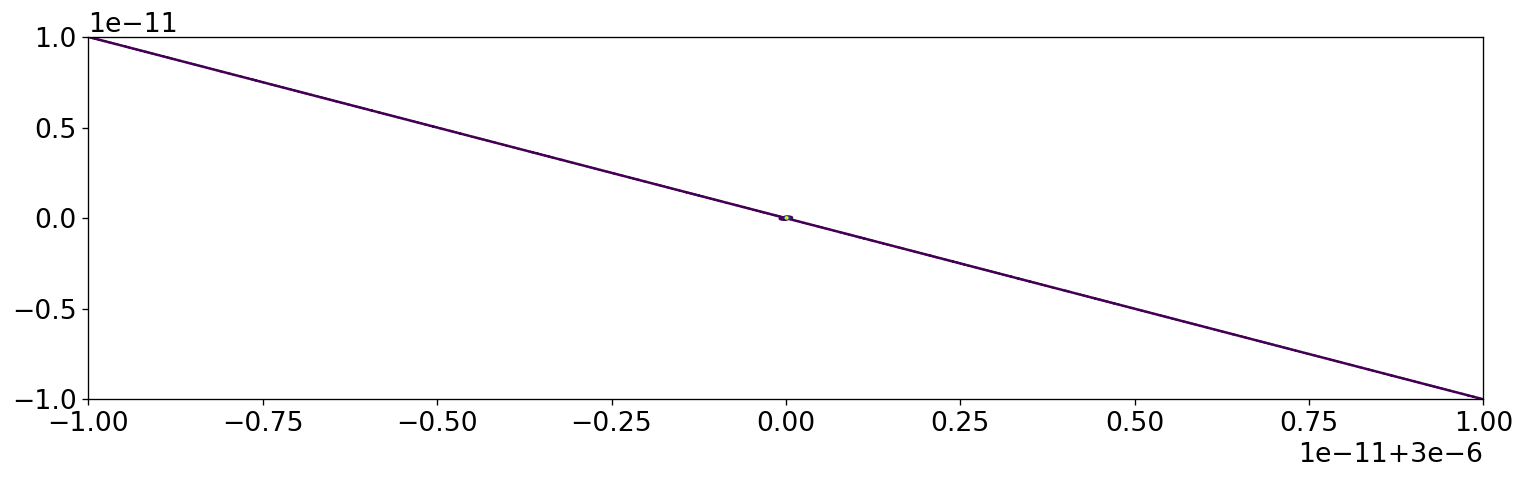

(<matplotlib.contour.QuadContourSet at 0x7f99f9843da0>, None)

In [87]:
m_1 = 3e-6
m_2 = 1-m_1
#m_1 = 4
#m_2 = 2
p_x, p_y = 0, 0
b, a = -0.000003, 0.00000000001
x, y =  np.linspace(-a,a,100), np.linspace(-a,a,100)
x, y =  np.linspace(-a-b,a-b,1000), np.linspace(-a,a,1000)
X,Y = np.meshgrid(x,y)
H_matirx = F_x(p_x, p_y, X, Y) + F_y(p_x, p_y, X, Y)
plt.contour(X,Y,H_matirx,100, vmin = 1), plt.show()#, *vmax*)
#plt.imshow(H_matirx, vmax=.1, vmin=-0.1),plt.colorbar(), 

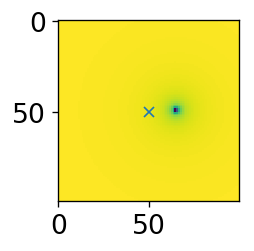

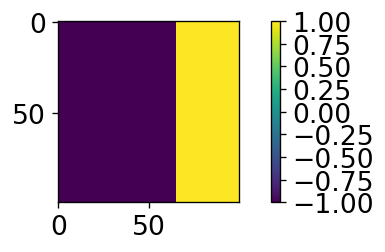

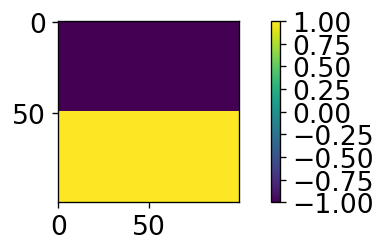

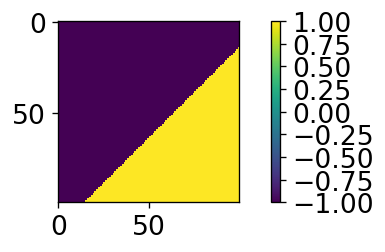

(<matplotlib.image.AxesImage at 0x7fb338f89ef0>,
 None)

In [4]:
m_1 = 3e-6
m_2 = 1-m_1
p_x, p_y = 0, 0
b, a =0, .00001
x, y =  np.linspace(-a,a,100), np.linspace(-a,a,100)
x, y =  np.linspace(-a-b,a-b,100), np.linspace(-a,a,100)
X,Y = np.meshgrid(x,y)
H_matirx = H(p_x, p_y, X, Y)
plt.imshow(H_matirx)
plt.plot(50,50,"x"), plt.show()
H_matirx = F_x(p_x, p_y, X, Y)
plt.imshow(H_matirx, vmax=1, vmin=-1),plt.colorbar(), plt.show()
H_matirx = F_y(p_x, p_y, X, Y)
plt.imshow(H_matirx, vmax=1, vmin=-1),plt.colorbar(), plt.show()
H_matirx = F_x(p_x, p_y, X, Y) + F_y(p_x, p_y, X, Y)
plt.imshow(H_matirx, vmax=1, vmin=-1),plt.colorbar(), plt.show()

# 

In [93]:
x_rand = lambda x_factor: x_factor * (2 * np.random.rand() - 1)

In [ ]:
x_factor = 0.000001
m_1 = 3e-6
m_2 = 1-m_1
m_1 = 3
m_2 = 2
p_x, p_y = 0.0, 0.0
accuracy = 1e-1
anz = 0
for n in range(1000000):
    x,y = x_rand(x_factor), x_rand(x_factor)
    F_yn = F_y(p_x, p_y, x,y)
    F_xn = F_x(p_x, p_y, x,y)
    if  abs(F_yn) < accuracy:
        plt.plot(x,y,"x", c="C0")
    if  abs(F_xn) < accuracy:
        plt.plot(x,y,"x", c="C1")
#plt.xlim(-x_factor,x_factor)
#plt.ylim(-x_factor,x_factor)
plt.show()
anz

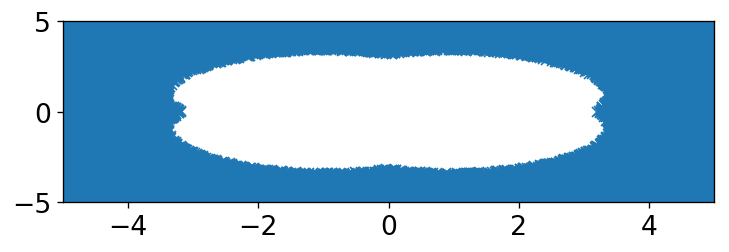

29993

In [16]:
x_factor = 5
m_1 = 3e-6
m_2 = 1-m_1
p_x, p_y = 0.0, -0.0
accuracy = 1e-1
anz = 0
for n in range(50000):
    x,y = x_rand(x_factor), x_rand(x_factor)
    F_yn = F_y(p_x, p_y, x,y)
    F_xn = F_x(p_x, p_y, x,y)
    if  abs(F_yn)+abs(F_xn) < accuracy:
        anz += 1
        plt.plot(x,y,"x", c="C0")
plt.xlim(-x_factor,x_factor)
plt.ylim(-x_factor,x_factor)
plt.show()
anz

In [91]:
?plt.hist(H_matirx.any(), bins=100, )

(array([ 1014.,   950.,   959.,   966.,  1080.,   991.,   995.,  1009.,
          999.,  1037.]),
 array([ -9.99914297e-01,  -7.99953741e-01,  -5.99993186e-01,
         -4.00032630e-01,  -2.00072075e-01,  -1.11519204e-04,
          1.99849036e-01,   3.99809592e-01,   5.99770147e-01,
          7.99730703e-01,   9.99691258e-01]),
 <a list of 10 Patch objects>)

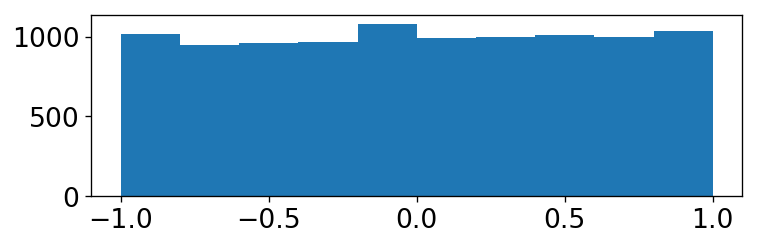

In [15]:
liste =[]
for n in range(10000):
    liste.append(2*np.random.rand()-1)
plt.hist(liste)

# Aufgabe 3.3. Residuals

In [ ]:
A = np.array([[1.2969, 0.8648],[0.2161, 0.1441]])
x = np.array([0.9911,-0.4870])
b = np.array([0.8642,0.1440])
x_calculated = np.linalg.lstsq(A,b)[0]
print(" residual with given values :", np.dot(A,x.T)-b,
      "\n residual with calculated x :", np.dot(A,x_calculated.T)-b,
      "\n with LU-decomposition we get the x:", x_calculated)

Beide Residuen sind sehr klein, aber das Residuum mit berechnetem x-Vektor ist nochmals 8 Größenordungen kleiner. Das neu berechnet x ist genauer und liegt bei der Maschinengenauigkeit. 

In [ ]:
np.linalg.lstsq(A,b)[0]

In [ ]:
sp.linalg.lu(A)
?sp.linalg.lstsq

# Spielen

In [ ]:
import scipy as sp
import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl # für Farben
import time
from scipy.linalg import solve

#                         LGS der Form: Ax=b
#     (Exponent,Basis)
def vektor_b(k,N): # gibt die einzelnen akkumulierten Teilsummen aus, für LGS als Vektor b
    n=1
    erg_sigma=[[0 for el in range(1) ]for zeilen in range(0,N,1)]
    sigma=0
    while n<=N:
        summand = n**k
        sigma=sigma+summand
        erg_sigma[n-1][0]=sigma
        n=n+1
    return erg_sigma    # Elemente von der Liste erg_sigma über erg_sigma[0,1,2...] ansprechen


#print(sum(2,3))

def matrix_A(k,N):
    
    mat_a=[[0 for zeilen in range(0,N,1)]for spalten in range(0,k+1,1)]
    
    for n in range(1,N+1,1):
        for l in range(1,k+2,1):
            pot= n**l
            mat_a[l-1][n-1]=pot
            
    return mat_a       
  
# Für jedes k eine zeile von koeffizienten

k=2
N=k+1

print(vektor_b(k,N))

x= vektor_b(k,N)
print(matrix_A(k,N))
A= matrix_A(k,N)
print(solve(matrix_A(k,N),vektor_b(k,N)))
np.linalg.lstsq(matrix_A(k,N),vektor_b(k,N))

In [ ]:
r = np.dot(np.array(A),np.array(x))

In [ ]:
sum_n = lambda N,k: sum([n**k for n in np.arange(N)+1])

In [ ]:
sum_n(8,7)